In [1]:
import scipy.stats as stats
import seaborn as sns
import numpy as np
from collections import namedtuple

In [2]:
def plot_hist(values, title):
    sns.histplot(values).set_title(title)

### Specify priors

In [3]:
beta_prior = namedtuple('beta_prior', ['a', 'b'])
uninf = beta_prior(1, 1)
inf_10_1 = beta_prior(10, 1)
inf_1_10 = beta_prior(1, 10)

#### 14.1  The sensitivity and specificity of a test for a disease

##### 14.1.2 Write Gibbs sampler

In [4]:
def get_next_samples(a, b, pi_prior, S_prior, C_prior, pi, S, C):
    Y1_prob = (pi*S)/ (pi*S + (1-pi)*(1-C))
    Y1 = stats.binom.rvs(a, Y1_prob, 0, 1)
    Y2_prob = (pi*(1-S))/ (pi*(1-S) + (1-pi)*C)
    Y2 = stats.binom.rvs(b, Y2_prob, size=1)
    pi_calc = stats.beta.rvs(Y1+Y2+pi_prior.a, a+b-Y1-Y2+pi_prior.b, size=1)
    S_calc = stats.beta.rvs(Y1+S_prior.a, Y2+S_prior.b, size=1)
    C_calc = stats.beta.rvs(b-Y2+C_prior.a, a-Y1+C_prior.b, size=1)
    
    return pi_calc[0], S_calc[0], C_calc[0]

In [5]:
def sampler(a, b, pi_prior, S_prior, C_prior, iters=10000):
    pis = [np.random.uniform(0, 1, 1)[0]]
    Ss = [np.random.uniform(0, 1, 1)[0]]
    Cs = [np.random.uniform(0, 1, 1)[0]]
    
    for i in range(iters):
        pi, S, C = get_next_samples(a, b, pi_prior, S_prior, C_prior, pis[-1], Ss[-1], Cs[-1])
        pis.append(pi)
        Ss.append(S)
        Cs.append(C)
        
    return pis, Ss, Cs

##### 14.1.3 Generate $\pi$ posterior for uninformative priors

In [6]:
a = 20
b = 80

In [7]:
pi, S, C = sampler(a, b, pi_prior=uninf, S_prior=uninf, C_prior=uninf)

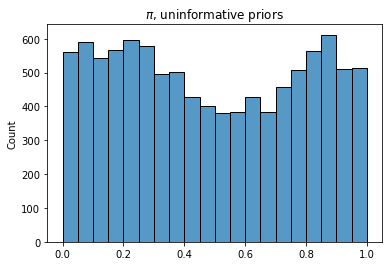

In [8]:
plot_hist(pi, '$\pi$, uninformative priors')

##### 14.1.4 Generate $\pi$ posterior for beta(10, 1) priors on S and C

In [9]:
pi, S, C = sampler(a, b, pi_prior=uninf, S_prior=inf_10_1, C_prior=inf_10_1)

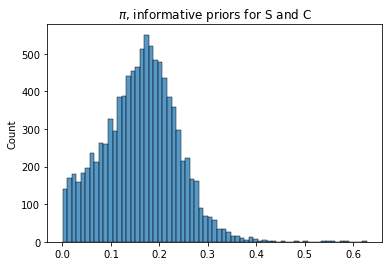

In [10]:
plot_hist(pi, '$\pi$, informative priors for S and C')

##### 14.1.5 Generate S and C posterior for informative prior on $\pi$

In [11]:
pi, S, C = sampler(a, b, pi_prior=inf_1_10, S_prior=uninf, C_prior=uninf)

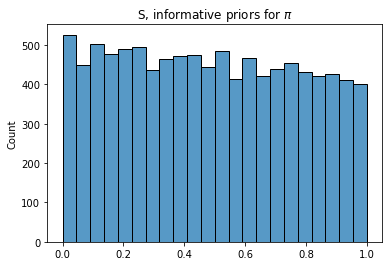

In [12]:
plot_hist(S, 'S, informative priors for $\pi$')

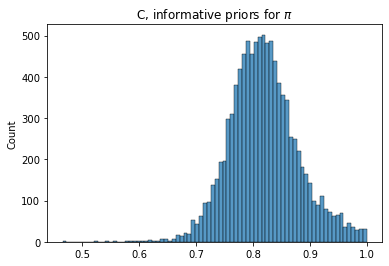

In [13]:
plot_hist(C, 'C, informative priors for $\pi$')

##### 14.1.6  Generate S posterior for informative prior on $\pi$ and C

In [14]:
pi, S, C = sampler(a, b, pi_prior=inf_1_10, S_prior=uninf, C_prior=inf_10_1)

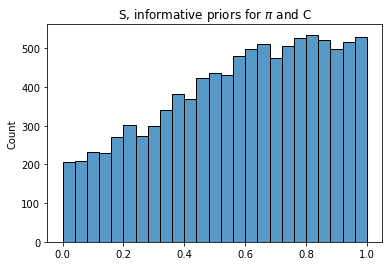

In [15]:
plot_hist(S, 'S, informative priors for $\pi$ and C')

##### 14.1.7 Increase sample size

In [16]:
pi, S, C = sampler(a*10, b*10, pi_prior=inf_1_10, S_prior=uninf, C_prior=inf_10_1)

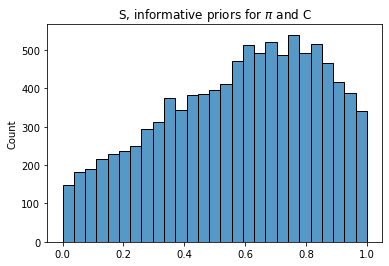

In [17]:
plot_hist(S, 'S, informative priors for $\pi$ and C')